<a href="https://colab.research.google.com/github/shakasom/GDS/blob/master/Part1%20-%20Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>Introduciton to Geopandas</center></h1>

In this tutorial part, we will learn the basics of loading and processing geographic data using Geopandas. Geopandas is built on top of Pandas and Numpy libraries. Like Pandas Dataframe, Geopandas data structure contains GeodataFrame and GeoSeries. Geopandas provides not only the capability to read and manipulate geographic data easily but also can perform many essential geospatial operations including among others geometric operations and projections which it borrows from the Shapely library. 

You can visualize and plot maps with Geopandas (provides a high-level interface to Matplotlib library) by using the plot() method on GeodataFrame/GeoSeries. In the first section, we will learn about geographic data, geographic coordinates and loading/writing geospatial data. 

Let us install first some libraries

In [0]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

### Learning Objectives:
1. Read and write geographic data in Geopandas.
2. Read csv files and convert into Geopandas GeodataFrame.
3. Project and set Coordinate reference systems (CRS).

## 1. Reading Geographic data
Geographic data (Vector) comes in different formats (Shapefiles, Geopackage, Geojson ...etc). Loading most of Geodata Formats with Geopandas is straightforward. We can use: 

```
read_file(path/to/file)

```


In [0]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px


In [8]:
!git clone --recursive https://github.com/shakasom/GDS.git

Cloning into 'GDS'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 18 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [10]:
# Let us see what we have inside GDS Folder
!ls GDS/dataset/

1-introData.zip


In [13]:
# We have zipped data so let us unzip it
!unzip GDS/dataset/1-introData.zip

Archive:  GDS/dataset/1-introData.zip
   creating: 1-introData/
  inflating: 1-introData/cities.geojson  
  inflating: 1-introData/countries.gpkg  
  inflating: 1-introData/rivers.gpkg  


In [0]:
# Read the data

# 1. Read Countries --> Geopackage Format
file = '1-introData/countries.gpkg'
countries = gpd.read_file(file)


In [15]:
countries.head()

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,(POLYGON ((117.7036079039552 4.163414542001791...
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,(POLYGON ((117.7036079039552 4.163414542001791...
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,(POLYGON ((-69.51008875199994 -17.506588197999...
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,(POLYGON ((-69.51008875199994 -17.506588197999...
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,(POLYGON ((-69.51008875199994 -17.506588197999...


In [16]:
# Rows and columns of the countries data
countries.shape

(253, 11)

In [17]:
# Describtive statistics of the countries data
countries.describe()

,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR
count,2.530000e+02,253.000000,2.530000e+02,253.000000,253.000000,253.000000
mean,2.927074e+07,11.462451,4.712708e+05,2000.794466,1639.592885,1991.490119
std,1.234639e+08,3.958562,1.936975e+06,178.959064,799.327438,218.598342
min,0.000000e+00,1.000000,0.000000e+00,0.000000,-99.000000,0.000000
25%,1.151200e+05,9.000000,2.851000e+03,2017.000000,2000.000000,2016.000000
50%,4.510327e+06,12.000000,3.299000e+04,2017.000000,2006.000000,2016.000000
75%,1.788524e+07,14.000000,1.890000e+05,2017.000000,2010.000000,2016.000000
max,1.379303e+09,18.000000,2.114000e+07,2017.000000,2012.000000,2016.000000


* `read_file(path/to/file)` --> read geographic data and return a GeodataFrame

*  `.head()` method returns back the first 5 rows. You can adjust the number of rows to get back if you want forexample `.head(8)`

* `.shape()` returns the number of rows and columns of the data

In [0]:

# 2. Read Cities --> Geojson Format
cities = gpd.read_file('1-introData/cities.geojson')

In [19]:
# Explore cities data
cities.head()


,name,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other,geometry
0,Colonia del Sacramento,0.0,0,-34.479999,-57.840002,21714,21714,0,POINT (-57.84000247340134 -34.47999900541754)
1,Trinidad,0.0,0,-33.543999,-56.900997,21093,21093,0,POINT (-56.90099656015872 -33.5439989373607)
2,Fray Bentos,0.0,0,-33.138999,-58.303997,23279,23279,0,POINT (-58.3039974719095 -33.1389990288435)
3,Canelones,0.0,0,-34.538004,-56.284001,19698,19698,0,POINT (-56.28400149324307 -34.53800400667546)
4,Florida,0.0,0,-34.099002,-56.214998,32234,32234,0,POINT (-56.21499844799416 -34.09900200521719)


In [20]:
cities.shape


(7343, 9)

In [21]:
cities.describe()

,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other
count,7343.000000,7343.000000,7343.000000,7343.000000,7.343000e+03,7.343000e+03,7.343000e+03
mean,0.009533,0.080349,20.496166,10.987582,3.218734e+05,2.078131e+05,4.137240e+05
std,0.097177,0.271851,29.263073,79.435193,1.066623e+06,6.414873e+05,1.258383e+06
min,0.000000,0.000000,-89.982894,-179.589979,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,0.000000,0.000000,-0.674573,-64.781974,1.947850e+04,1.337000e+04,0.000000e+00
50%,0.000000,0.000000,26.640298,18.699985,6.945100e+04,5.003200e+04,3.981700e+04
75%,0.000000,0.000000,43.532008,73.292415,2.297540e+05,1.634720e+05,2.230085e+05
max,1.000000,1.000000,82.483323,179.383304,3.567600e+07,1.460851e+07,2.145995e+07


Usually, we need to plot our data as a map. Geopandas is built on top of Matplotlib and Descartes to visualize maps easily. We can use this method to easily plot a map,
```
GeodataFrame.plot()

```


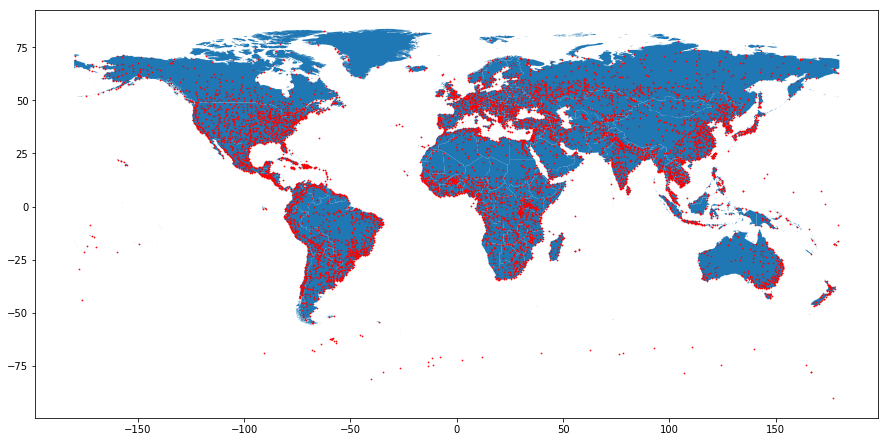

In [61]:
# Plot overlayed maps
fig, ax = plt.subplots(figsize=(12,12))
countries.plot(ax=ax)
cities.plot(markersize=0.5, color='red',ax=ax)
plt.tight_layout()
plt.savefig('overlay_map.png')
plt.show()


<div class="alert alert-block alert-success">
       Exercise 1.1: Read the rivers data
</div>
<div class="alert alert-block alert-success">
       Exercise 1.2: Read the first 5 rows of the rivers dataset
</div>
<div class="alert alert-block alert-success">
       Exercise 1.3: Visualize rivers dataset. 
</div>


## 2. Coordinate systems and Projections

Coordinate reference systems represent how our data as two dimensional (planar) relates to actual places on earth. It is the glue that holds the attributes to their respective locations. Geodataframes has .crs attribute that can give you the original CRS used in the data. It is easy to transform and project these coordinates. However, to perform projections, it is necessary to have the same CRS  in order to carry out geographic analysis and get the right values out the analysis. The countries, cities and rivers have the same CRS. Let us check them.

In [27]:
# Data
countries.head()

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,(POLYGON ((117.7036079039552 4.163414542001791...
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,(POLYGON ((117.7036079039552 4.163414542001791...
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,(POLYGON ((-69.51008875199994 -17.506588197999...
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,(POLYGON ((-69.51008875199994 -17.506588197999...
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,(POLYGON ((-69.51008875199994 -17.506588197999...


In [28]:
# CRS
countries.crs == cities.crs

True

In [29]:
countries.crs

{'init': 'epsg:4326'}

Different CRS have different measurements. For some, the coordinates are defined in decimal degrees while others are defined in meters. It is common process to reproject data from one format to another in Geographic data processing. This source is very useful in visualizing and comparing different Projections: https://map-projections.net/compare.php?p1=mercator-84&p2=robinson&sps=1

We will project our data into mercator. The Mercator projection, latitude-longitude quadrangles are stretched along the x-axis and y-axis as you move away from the equator.

In [30]:
# Look at the geometry column: decimal degrees
countries.geometry[:5]

0    (POLYGON ((117.7036079039552 4.163414542001791...
1    (POLYGON ((117.7036079039552 4.163414542001791...
2    (POLYGON ((-69.51008875199994 -17.506588197999...
3    (POLYGON ((-69.51008875199994 -17.506588197999...
4    (POLYGON ((-69.51008875199994 -17.506588197999...
Name: geometry, dtype: object

In [31]:
# Project the data into Mercator Projection epsg=3395
countries_projected = countries.to_crs({'init': 'epsg:3395'})

# See the geometry column of the projected countries
countries_projected['geometry'][:5]

0    (POLYGON ((13102705.69639943 460777.6522179524...
1    (POLYGON ((13102705.69639943 460777.6522179524...
2    (POLYGON ((-7737827.684867887 -1967028.7849201...
3    (POLYGON ((-7737827.684867887 -1967028.7849201...
4    (POLYGON ((-7737827.684867887 -1967028.7849201...
Name: geometry, dtype: object

Due to the projection, the geometry is no longer in lat/lon style. It is easier to understand the difference in maps. Let us plot both the original countries and the projected countries.

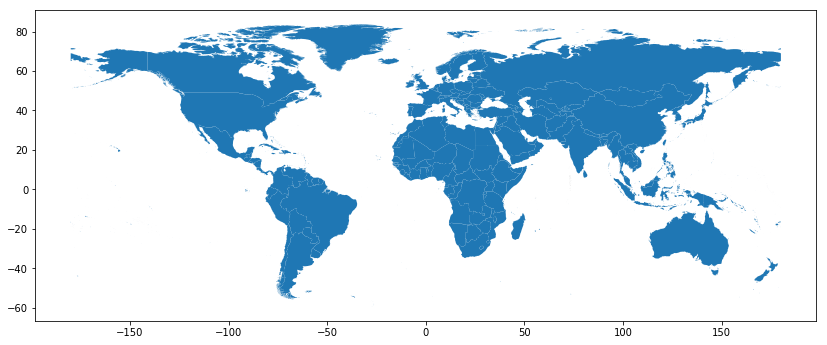

In [64]:
# Let us plot both unprojected and projected countries
countries.plot(figsize=(14,12));
plt.savefig("wgs84.png")

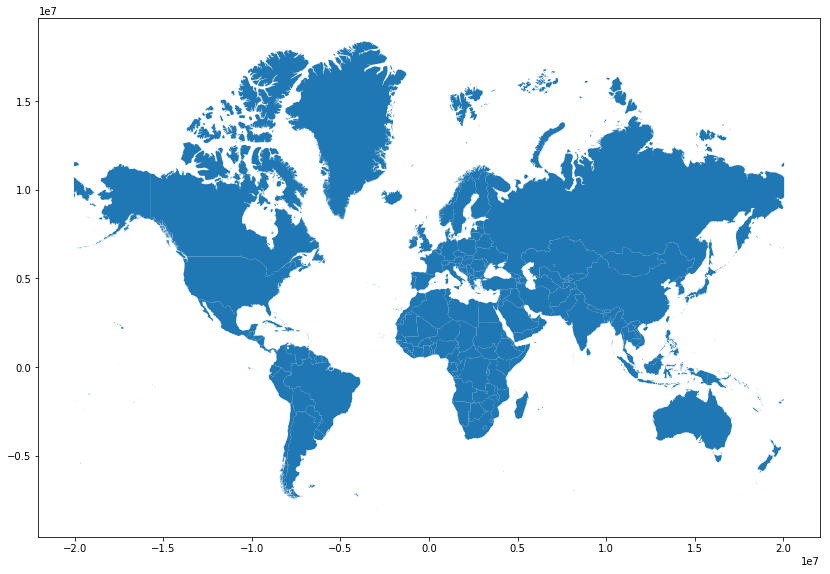

In [65]:
countries_projected.plot(figsize=(14,12));
plt.savefig("mercator.png")

Notice the different scales of x and y in both maps. If you try to overlay the projected data with unprojected data, then your data will not align properly. Let us see if we can plot cities on the top of projected countries. Remember we have not projected the cities.

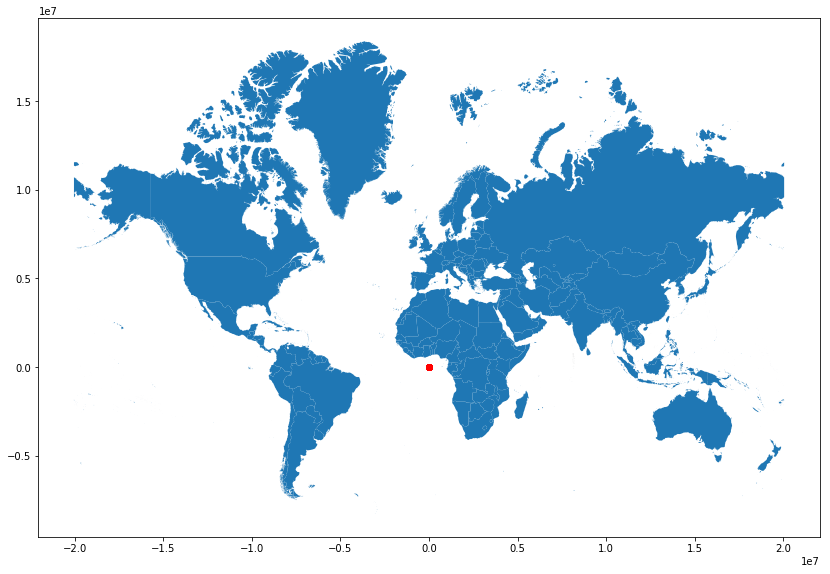

In [67]:
fig, ax = plt.subplots(figsize=(14,12))
countries_projected.plot(ax=ax)
# Cities are still in WGS84
cities.plot(ax=ax, color='red'); 
plt.savefig('overlay_unproj.png')

<div class="alert alert-block alert-success">
       Exercise 2.1: Convert the cities data into EPSG:3395 and plot cities on top of countries_projected
</div>

## 3.Write Geographice Data 
We can easily save any new data created to our local disk. This is helpful when you want to access that file in another time without carrying out the same operations again. Let us save our projected countries to our disk space. Remember we have projected it. So in case we need it another time, let us save it.

Geopandas has:

```
to_file(path/to/file + extension)

```

In [46]:
# Data
countries_projected.head()

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,(POLYGON ((13102705.69639943 460777.6522179524...
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,(POLYGON ((13102705.69639943 460777.6522179524...
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,(POLYGON ((-7737827.684867887 -1967028.7849201...
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,(POLYGON ((-7737827.684867887 -1967028.7849201...
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,(POLYGON ((-7737827.684867887 -1967028.7849201...


In [47]:

#CRS
countries_projected.crs

{'init': 'epsg:3395'}

In [0]:
# Save projected countries 
shp = '1-introData/countries_epsg3395.shp'
countries_projected.to_file(shp)

<div class="a">
       Exercise 3.1: Save the projected cities file you created in exercise 2.1 into a file
</div>

# END